## Integración de la información

Integración de la información de los Datasets con los datos limpiados

In [112]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

In [113]:
import warnings
warnings.filterwarnings('ignore')

In [114]:
df_ds = pd.read_csv('../../Data/DATOS_LIMPIOS/delitos_sexuales.csv')
df_e = pd.read_csv('../../Data/DATOS_LIMPIOS/extorsion.csv')
df_h = pd.read_csv('../../Data/DATOS_LIMPIOS/homicidios.csv')
df_vi = pd.read_csv('../../Data/DATOS_LIMPIOS/violencia_intrafamiliar.csv', low_memory=False)

### Tipos de datos

In [115]:
df_ds.dtypes

DEPARTAMENTO     object
MUNICIPIO        object
CODIGO DANE     float64
ARMAS MEDIOS     object
FECHA HECHO      object
GENERO           object
GRUPO ETARIO     object
CANTIDAD          int64
delito           object
dtype: object

In [116]:
df_e.dtypes

FECHA HECHO     object
COD_DEPTO        int64
DEPARTAMENTO    object
COD_MUNI         int64
MUNICIPIO       object
CANTIDAD         int64
dtype: object

In [117]:
df_h.dtypes

DEPARTAMENTO            object
MUNICIPIO               object
CODIGO DANE              int64
ARMAS MEDIOS            object
FECHA HECHO             object
GENERO                  object
GRUPO ETARÍO            object
DESCRIPCIÓN CONDUCTA    object
CANTIDAD                 int64
dtype: object

In [118]:
df_vi.dtypes

DEPARTAMENTO    object
MUNICIPIO       object
CODIGO DANE     object
ARMAS MEDIOS    object
FECHA HECHO     object
GENERO          object
GRUPO ETARIO    object
CANTIDAD         int64
dtype: object

Las variables que comparten los datasets y que se unificaran son: 
- DEPARTAMENTO
- MUNICIPIO
- FECHA HECHO
- CANTIDAD

Nueva variable para identificar el tipo de delito:
- TIPO: Delito_sexual, violencia_intrafamiliar, extorcion, homicidio

#### Union de los dataframe

In [119]:
df_concat = pd.concat([df_ds[['DEPARTAMENTO', 'MUNICIPIO', 'FECHA HECHO', 'CANTIDAD']], 
df_h[['DEPARTAMENTO', 'MUNICIPIO', 'FECHA HECHO', 'CANTIDAD']], 
df_e[['DEPARTAMENTO', 'MUNICIPIO', 'FECHA HECHO', 'CANTIDAD']], 
df_vi[['DEPARTAMENTO', 'MUNICIPIO', 'FECHA HECHO', 'CANTIDAD']]], axis=0)

In [120]:
df_concat

,DEPARTAMENTO,MUNICIPIO,FECHA HECHO,CANTIDAD
0,CAQUETÁ,SOLANO,2010-01-01,1
1,BOLÍVAR,CARTAGENA (CT),2010-01-01,1
2,HUILA,LA PLATA,2010-01-01,1
3,SANTANDER,PIEDECUESTA,2010-01-01,1
4,META,VILLAVICENCIO (CT),2010-01-01,1
...,...,...,...,...
527264,VICHADA,PUERTO CARREÑO (CT),2022-04-17,1
527265,VICHADA,SANTA ROSALÍA,2022-01-18,1
527266,VICHADA,SANTA ROSALÍA,2022-12-02,1
527267,VICHADA,SANTA ROSALÍA,2022-02-16,1


In [121]:
df_concat.dtypes

DEPARTAMENTO    object
MUNICIPIO       object
FECHA HECHO     object
CANTIDAD         int64
dtype: object

In [122]:
df_concat['FECHA HECHO'] = pd.to_datetime(df_concat['FECHA HECHO'])
df_concat = df_concat[df_concat['FECHA HECHO'] >= '2018-01-01']
df_concat.reset_index(drop=True, inplace=True)

In [123]:
df_concat

,DEPARTAMENTO,MUNICIPIO,FECHA HECHO,CANTIDAD
0,ANTIOQUIA,MEDELLÍN (CT),2018-01-01,1
1,QUINDÍO,MONTENEGRO,2018-01-01,1
2,QUINDÍO,ARMENIA (CT),2018-01-01,1
3,CUNDINAMARCA,BOGOTÁ D.C. (CT),2018-01-01,1
4,CALDAS,VITERBO,2018-01-01,1
...,...,...,...,...
462833,VICHADA,PUERTO CARREÑO (CT),2022-04-17,1
462834,VICHADA,SANTA ROSALÍA,2022-01-18,1
462835,VICHADA,SANTA ROSALÍA,2022-12-02,1
462836,VICHADA,SANTA ROSALÍA,2022-02-16,1


### Información sobre la proyeccion poblacional

In [124]:
df_proyeccion = pd.read_csv('../../Data/Poblacion-prediccion-2035.csv', sep=';')
df_proyeccion

,DEPARTAMENTO,MUNICIPIO,ANO,Total
0,Antioquia,Medellín,2018,2.427.129
1,Antioquia,Medellín,2019,2.483.545
2,Antioquia,Medellín,2020,2.533.424
3,Antioquia,Medellín,2021,2.573.220
4,"Bogotá, D.C.","Bogotá, D.C.",2022,7.901.653
...,...,...,...,...
5605,Vichada,Cumaribo,2018,72.691
5606,Vichada,Cumaribo,2019,76.196
5607,Vichada,Cumaribo,2020,78.863
5608,Vichada,Cumaribo,2021,79.984


In [125]:
df_proyeccion.dtypes

DEPARTAMENTO    object
MUNICIPIO       object
ANO              int64
Total           object
dtype: object

Se seleccionan los municipios con población mayor a un millon 

In [126]:
def todot(x):
    return x.replace(".", "")

df_proyeccion['Total']=df_proyeccion['Total'].apply(todot)
df_proyeccion['Total']=df_proyeccion['Total'].astype('float64')
df_dep_m = df_proyeccion[df_proyeccion['Total'] > 1000000]
df_dep_m.reset_index(drop=True, inplace=True)

In [127]:
df_dep_m['DEPARTAMENTO']=df_dep_m['DEPARTAMENTO'].str.upper()
df_dep_m['MUNICIPIO']=df_dep_m['MUNICIPIO'].str.upper()

In [128]:
df_dep_m['MUNICIPIO'].replace({"BOGOTÁ, D.C.": "BOGOTÁ D.C. (CT)", "MEDELLÍN": "MEDELLÍN (CT)", "CARTAGENA DE INDIAS": "CARTAGENA (CT)", "CALI": "CALI (CT)", "BARRANQUILLA": "BARRANQUILLA (CT)"}, inplace=True)
df_dep_m['DEPARTAMENTO'].replace("BOGOTÁ, D.C.", "CUNDINAMARCA", inplace=True)

In [129]:
df_dep_m

,DEPARTAMENTO,MUNICIPIO,ANO,Total
0,ANTIOQUIA,MEDELLÍN (CT),2018,2427129.0
1,ANTIOQUIA,MEDELLÍN (CT),2019,2483545.0
2,ANTIOQUIA,MEDELLÍN (CT),2020,2533424.0
3,ANTIOQUIA,MEDELLÍN (CT),2021,2573220.0
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),2022,7901653.0
5,ANTIOQUIA,MEDELLÍN (CT),2022,2612958.0
6,VALLE DEL CAUCA,CALI (CT),2022,2280907.0
7,ATLÁNTICO,BARRANQUILLA (CT),2022,1312473.0
8,BOLÍVAR,CARTAGENA (CT),2022,1055035.0
9,ATLÁNTICO,BARRANQUILLA (CT),2018,1206319.0


In [130]:
df_dep_m.dtypes

DEPARTAMENTO     object
MUNICIPIO        object
ANO               int64
Total           float64
dtype: object

#### SELECCIONAR LOS MUNICIPIOS SEGÚN LA CANTIDAD DE HABITANTES

In [131]:
municipios=list(df_dep_m['MUNICIPIO'].unique())
df_concat=df_concat[df_concat['MUNICIPIO'].isin(municipios)]

In [132]:
df_concat.reset_index(drop=True, inplace=True)
df_concat

,DEPARTAMENTO,MUNICIPIO,FECHA HECHO,CANTIDAD
0,ANTIOQUIA,MEDELLÍN (CT),2018-01-01,1
1,CUNDINAMARCA,BOGOTÁ D.C. (CT),2018-01-01,1
2,ANTIOQUIA,MEDELLÍN (CT),2018-01-01,1
3,ANTIOQUIA,MEDELLÍN (CT),2018-01-01,1
4,BOLÍVAR,CARTAGENA (CT),2018-01-01,1
...,...,...,...,...
119704,VALLE,CALI (CT),2022-04-27,2
119705,VALLE,CALI (CT),2022-04-27,2
119706,VALLE,CALI (CT),2022-04-28,2
119707,VALLE,CALI (CT),2022-04-29,2


Se agrupan la cantidad de delitos por dia

In [133]:
df1 = df_concat.groupby(['FECHA HECHO', 'MUNICIPIO']).sum().reset_index()
df1

,FECHA HECHO,MUNICIPIO,CANTIDAD
0,2018-01-01,BARRANQUILLA (CT),19
1,2018-01-01,BOGOTÁ D.C. (CT),172
2,2018-01-01,CALI (CT),31
3,2018-01-01,CARTAGENA (CT),21
4,2018-01-01,MEDELLÍN (CT),90
...,...,...,...
7887,2022-12-04,BARRANQUILLA (CT),5
7888,2022-12-04,BOGOTÁ D.C. (CT),91
7889,2022-12-04,CALI (CT),11
7890,2022-12-04,CARTAGENA (CT),8


Se agrupan los dos dataframe por el municipio y el año para tener la población

In [142]:
df_dep_m = df_dep_m.rename(columns={'ANO':'FECHA'})
df1["FECHA"] = df1["FECHA HECHO"].dt.year

df2 = pd.merge(df1,df_dep_m,on=('MUNICIPIO', 'FECHA'),how='left')
df2['Proporcion'] = df2['CANTIDAD']/df2['Total']*100

df2 = df2.dropna()

In [150]:
df2.head(20)

,FECHA HECHO,MUNICIPIO,CANTIDAD,FECHA,DEPARTAMENTO,Total,Proporcion
0,2018-01-01,BARRANQUILLA (CT),19,2018,ATLÁNTICO,1206319.0,0.001575
1,2018-01-01,BOGOTÁ D.C. (CT),172,2018,CUNDINAMARCA,7412566.0,0.002320
2,2018-01-01,CALI (CT),31,2018,VALLE DEL CAUCA,2227642.0,0.001392
4,2018-01-01,MEDELLÍN (CT),90,2018,ANTIOQUIA,2427129.0,0.003708
5,2018-01-02,BARRANQUILLA (CT),7,2018,ATLÁNTICO,1206319.0,0.000580
6,2018-01-02,BOGOTÁ D.C. (CT),132,2018,CUNDINAMARCA,7412566.0,0.001781
7,2018-01-02,CALI (CT),21,2018,VALLE DEL CAUCA,2227642.0,0.000943
9,2018-01-02,MEDELLÍN (CT),55,2018,ANTIOQUIA,2427129.0,0.002266
10,2018-01-03,BARRANQUILLA (CT),5,2018,ATLÁNTICO,1206319.0,0.000414
11,2018-01-03,BOGOTÁ D.C. (CT),136,2018,CUNDINAMARCA,7412566.0,0.001835


In [157]:
dfs = []
municipios = []
for i in df2.MUNICIPIO.unique():
    print(i)
    municipios.append(i)
    dfs.append(df2.loc[df2.MUNICIPIO == i])

BARRANQUILLA (CT)
BOGOTÁ D.C. (CT)
CALI (CT)
MEDELLÍN (CT)
CARTAGENA (CT)


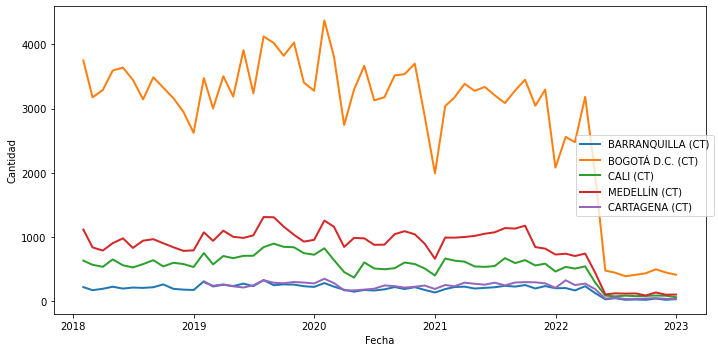

In [158]:
fig, ax = plt.subplots(1, figsize=(10,5))

count = 0

for df in dfs:
    df = df.set_index("FECHA HECHO").resample('M').sum().reset_index()
    ax.plot(df['FECHA HECHO'], df['CANTIDAD'],linewidth=2, label=municipios[count])
    count += 1
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad')


fig.legend(labels=municipios, loc="center right")
fig.tight_layout()
fig.show() 

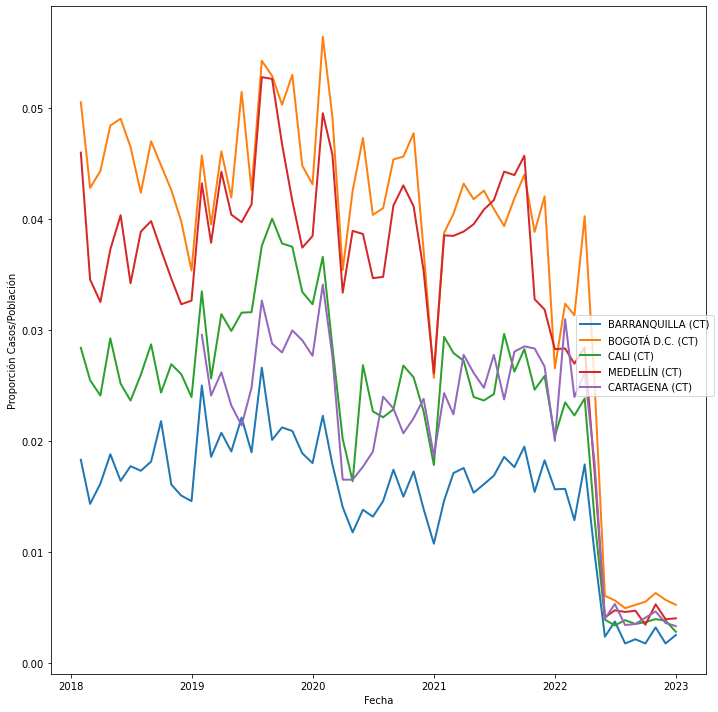

In [159]:
fig, ax = plt.subplots(1, figsize=(10,10))

count = 0

for df in dfs:
    df = df.set_index("FECHA HECHO").resample('M').sum().reset_index()
    ax.plot(df['FECHA HECHO'], df['Proporcion'],linewidth=2, label=municipios[count])
    count += 1
    plt.xlabel('Fecha')
    plt.ylabel('Proporción Casos/Población')


fig.legend(labels=municipios, loc="center right")
fig.tight_layout()
fig.show() 